<a href="https://colab.research.google.com/github/AnirudhJM24/Rental-market-segmentation/blob/main/psychographic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Punewithlocation.csv',index_col=0)

In [ ]:
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,lightbill,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,rent,lat,lng
0,2,2,1050.0,Unfurnished,All,Pingale Wasti,5,West,Marble,Yes,No,0,None,None,0,2,5 to 10 Year Old,1,0,0,0,0,0,0,0,3,20000.0,NaN,NaN
1,2,2,760.0,Unfurnished,All,Wagholi,5,East,Vitrified,Yes,Yes,2,None,None,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,14000.0,18.580630,73.983310
2,1,1,628.0,Furnished,Family Only,Wanowrie,3,East,Mosaic,Yes,No,1,None,None,0,0,10+ Year Old,1,0,0,0,0,0,0,0,40000,13000.0,18.488368,73.898667
3,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",Uruli Devachi,6,South,Polished concrete,Yes,Yes,1,None,None,1,1,1 to 5 Year Old,1,0,0,0,0,0,0,0,20,7500.0,NaN,NaN
4,2,2,950.0,Semifurnished,Family Only,Baner,1,No Direction,Ceramic,No,No,1,None,None,1,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,50000,17000.0,18.564243,73.776857


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 1 to 8306
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            7524 non-null   int64  
 1   bathrooms          7524 non-null   int64  
 2   area               7524 non-null   float64
 3   furnishing         7524 non-null   object 
 4   avalable_for       7524 non-null   object 
 5   address            7524 non-null   object 
 6   floor_number       7524 non-null   int64  
 7   facing             7524 non-null   object 
 8   floor_type         7524 non-null   object 
 9   gate_community     7524 non-null   object 
 10  corner_pro         7524 non-null   object 
 11  parking            7524 non-null   int64  
 12  wheelchairadption  7524 non-null   object 
 13  petfacility        7524 non-null   object 
 14  lightbill          7524 non-null   int64  
 15  powerbackup        7524 non-null   int64  
 16  propertyage        7524 

Required features are : furnishing , floor_number , facing , gate_community , parking , wheelchairadption , petfacility , pooja_room , study_room , servant_room , store_room , powerbackup , parking, floor_type , rent, avalable_for , area , bathrooms, bedroom,facing

In [ ]:
df1 = df.drop(['brok_amt','deposit_amt','address','lat','lng','corner_pro','lightbill','others'],axis = 1)

In [ ]:
df1.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,parking,wheelchairadption,petfacility,powerbackup,propertyage,no_room,pooja_room,study_room,servant_room,store_room,maintenance_amt,rent
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,2,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,14000.0
2,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,1,None,None,0,10+ Year Old,1,0,0,0,0,0,13000.0
4,2,2,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,1,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,17000.0
6,2,2,900.0,Unfurnished,All,1,No Direction,Not provided,No,1,None,None,0,5 to 10 Year Old,1,0,0,0,0,0,18000.0
7,3,3,0.0,Semifurnished,Family Only,7,North,Not provided,Yes,1,None,None,0,1 to 5 Year Old,0,0,0,1,0,0,35000.0


In [ ]:
df1 = df1[df1.area>0]

In [ ]:
df1.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,parking,wheelchairadption,petfacility,powerbackup,propertyage,no_room,pooja_room,study_room,servant_room,store_room,maintenance_amt,rent
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,2,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,14000.0
2,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,1,None,None,0,10+ Year Old,1,0,0,0,0,0,13000.0
4,2,2,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,1,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,17000.0
6,2,2,900.0,Unfurnished,All,1,No Direction,Not provided,No,1,None,None,0,5 to 10 Year Old,1,0,0,0,0,0,18000.0
8,3,3,1400.0,Unfurnished,All,2,North-West,Vitrified,Yes,1,None,None,2,5 to 10 Year Old,0,1,0,0,0,0,25999.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 1 to 8306
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            4522 non-null   int64  
 1   bathrooms          4522 non-null   int64  
 2   area               4522 non-null   float64
 3   furnishing         4522 non-null   object 
 4   avalable_for       4522 non-null   object 
 5   floor_number       4522 non-null   int64  
 6   facing             4522 non-null   object 
 7   floor_type         4522 non-null   object 
 8   gate_community     4522 non-null   object 
 9   parking            4522 non-null   int64  
 10  wheelchairadption  4522 non-null   object 
 11  petfacility        4522 non-null   object 
 12  powerbackup        4522 non-null   int64  
 13  propertyage        4522 non-null   object 
 14  no_room            4522 non-null   int64  
 15  pooja_room         4522 non-null   int64  
 16  study_room         4522 

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1["furnishing_e"] = encoder.fit_transform(df1["furnishing"])
df1["avalable_for_e"] = encoder.fit_transform(df1["avalable_for"])
df1["facing_e"] = encoder.fit_transform(df1["facing"])
df1["floor_type_e"] = encoder.fit_transform(df1["floor_type"])
df1["gate_community_e"] = encoder.fit_transform(df1["gate_community"])
df1["wheelchairadption_e"] = encoder.fit_transform(df1["wheelchairadption"]) 
df1["petfacility_e"] = encoder.fit_transform(df1["petfacility"])
df1["propertyage_e"] = encoder.fit_transform(df1["propertyage"]) 


df1.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,parking,wheelchairadption,petfacility,powerbackup,propertyage,no_room,pooja_room,study_room,servant_room,store_room,maintenance_amt,rent,furnishing_e,avalable_for_e,facing_e,floor_type_e,gate_community_e,wheelchairadption_e,petfacility_e,propertyage_e
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,2,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,14000.0,3,0,0,13,1,0,0,1
2,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,1,None,None,0,10+ Year Old,1,0,0,0,0,0,13000.0,0,6,0,6,1,0,0,2
4,2,2,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,1,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,17000.0,1,6,1,1,0,0,0,1
6,2,2,900.0,Unfurnished,All,1,No Direction,Not provided,No,1,None,None,0,5 to 10 Year Old,1,0,0,0,0,0,18000.0,3,0,1,7,0,0,0,3
8,3,3,1400.0,Unfurnished,All,2,North-West,Vitrified,Yes,1,None,None,2,5 to 10 Year Old,0,1,0,0,0,0,25999.0,3,0,4,13,1,0,0,3


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 1 to 8306
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedroom              4522 non-null   int64  
 1   bathrooms            4522 non-null   int64  
 2   area                 4522 non-null   float64
 3   furnishing           4522 non-null   object 
 4   avalable_for         4522 non-null   object 
 5   floor_number         4522 non-null   int64  
 6   facing               4522 non-null   object 
 7   floor_type           4522 non-null   object 
 8   gate_community       4522 non-null   object 
 9   parking              4522 non-null   int64  
 10  wheelchairadption    4522 non-null   object 
 11  petfacility          4522 non-null   object 
 12  powerbackup          4522 non-null   int64  
 13  propertyage          4522 non-null   object 
 14  no_room              4522 non-null   int64  
 15  pooja_room           4522 non-null   i

In [ ]:
list1 = ['rent','bedroom','bathrooms','area','parking','pooja_room','study_room','servant_room','store_room','furnishing_e','avalable_for_e','facing_e','floor_type_e','gate_community_e','wheelchairadption_e','petfacility_e','propertyage_e']

In [ ]:
x = df1.loc[:,list1].values

In [ ]:
x

array([[1.4e+04, 2.0e+00, 2.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [1.3e+04, 1.0e+00, 1.0e+00, ..., 0.0e+00, 0.0e+00, 2.0e+00],
       [1.7e+04, 2.0e+00, 2.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       ...,
       [5.5e+04, 3.0e+00, 4.0e+00, ..., 1.0e+00, 1.0e+00, 3.0e+00],
       [1.4e+04, 2.0e+00, 2.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [2.3e+04, 1.0e+00, 1.0e+00, ..., 0.0e+00, 0.0e+00, 3.0e+00]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal_component_1', 'principal_component_2'])

In [ ]:
pf

,principal_component_1,principal_component_2
0,-3218.494526,17.067647
1,-4222.015965,-84.761862
2,-214.134119,116.646489
3,783.906952,36.558232
4,8794.335799,295.470733
...,...,...
4517,2780.139422,-118.621635
4518,-2214.732438,126.892325
4519,37811.995537,411.760699
4520,-3224.426828,-179.843719


In [ ]:
pf1 = pf[pf.principal_component_2<6000]

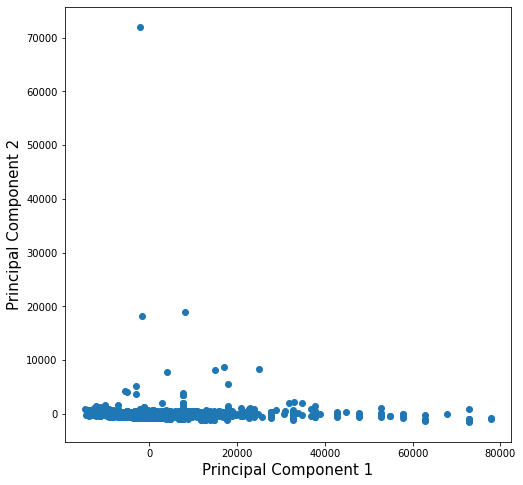

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal_component_1']
               , pf['principal_component_2'])

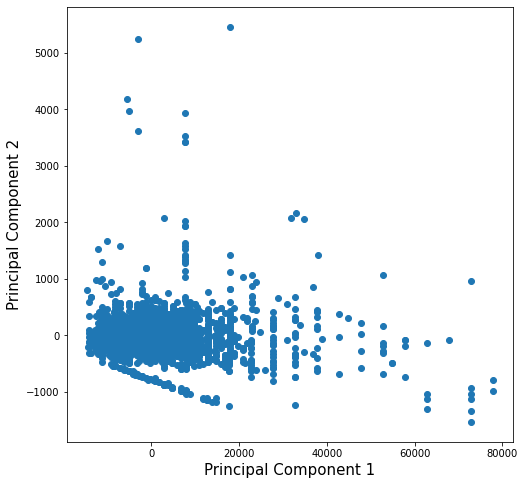

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf1['principal_component_1']
               , pf1['principal_component_2'])

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

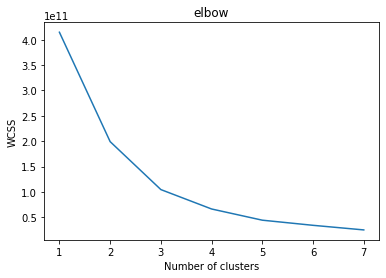

In [ ]:
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
kmeansp = kmeans.predict(x)

In [ ]:
labels = kmeans.labels_
print(labels[:100])

[0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0]


In [ ]:
df1['cluster_num'] = labels

In [ ]:
df1.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,parking,wheelchairadption,petfacility,powerbackup,propertyage,no_room,pooja_room,study_room,servant_room,store_room,maintenance_amt,rent,furnishing_e,avalable_for_e,facing_e,floor_type_e,gate_community_e,wheelchairadption_e,petfacility_e,propertyage_e,cluster_num
1,2,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,2,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,14000.0,3,0,0,13,1,0,0,1,0
2,1,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,1,None,None,0,10+ Year Old,1,0,0,0,0,0,13000.0,0,6,0,6,1,0,0,2,0
4,2,2,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,1,None,None,2,1 to 5 Year Old,1,0,0,0,0,0,17000.0,1,6,1,1,0,0,0,1,0
6,2,2,900.0,Unfurnished,All,1,No Direction,Not provided,No,1,None,None,0,5 to 10 Year Old,1,0,0,0,0,0,18000.0,3,0,1,7,0,0,0,3,0
8,3,3,1400.0,Unfurnished,All,2,North-West,Vitrified,Yes,1,None,None,2,5 to 10 Year Old,0,1,0,0,0,0,25999.0,3,0,4,13,1,0,0,3,1


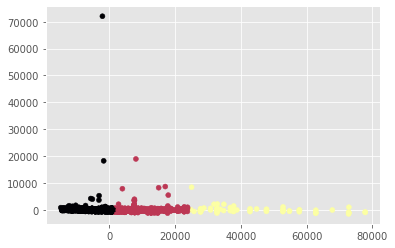

In [ ]:
plt.scatter(pf['principal_component_1'], pf['principal_component_2'], c=kmeansp, s=25, cmap='inferno')

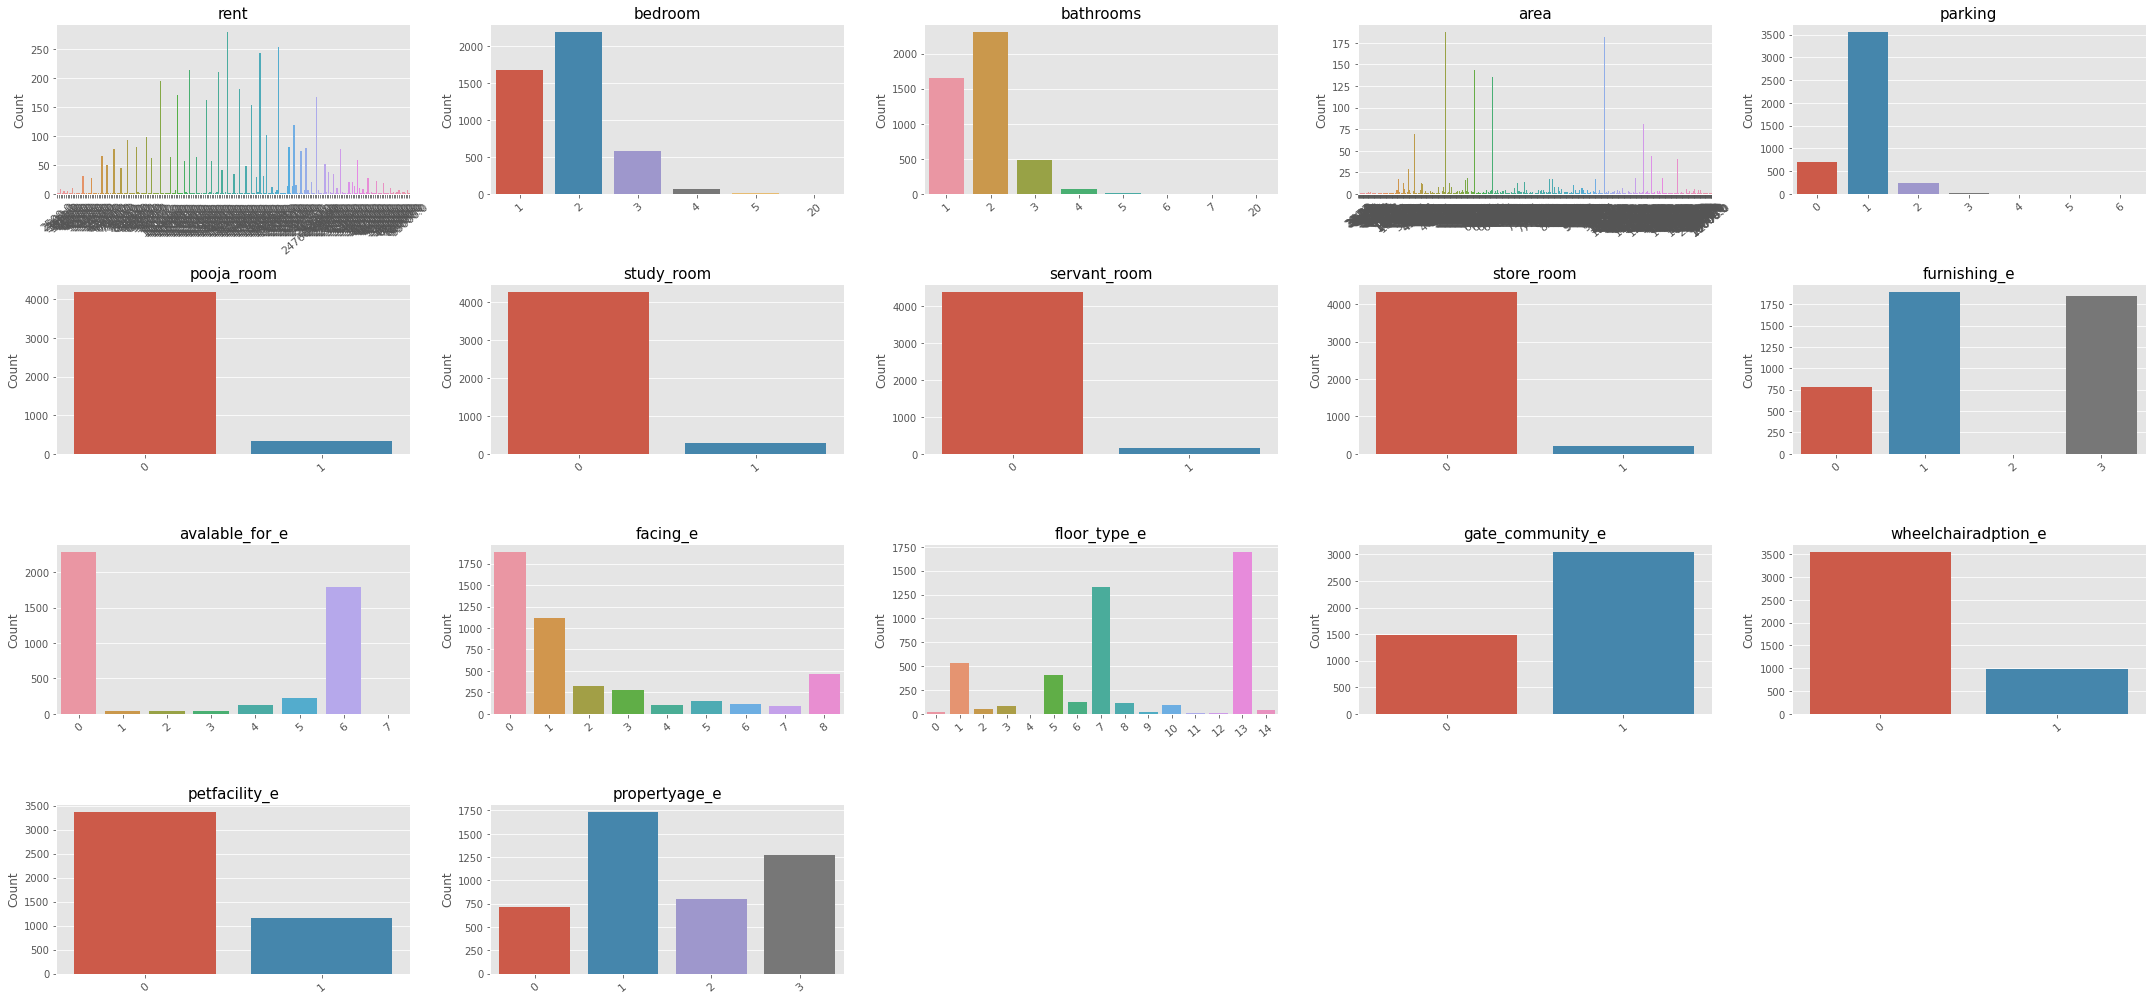

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 14))
plt.style.use('ggplot')

def plotgraph(title,i):
  plt.subplot(4,5,i)
  ax = sns.countplot(x=title, data=df1)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
  ax.set_title(title,fontsize = 15)
  ax.set_xlabel('',fontsize = 12)
  ax.set_ylabel('Count', fontsize = 12)
  plt.tight_layout()

i = 1
for each in list1:
  plotgraph(each,i)
  i+=1

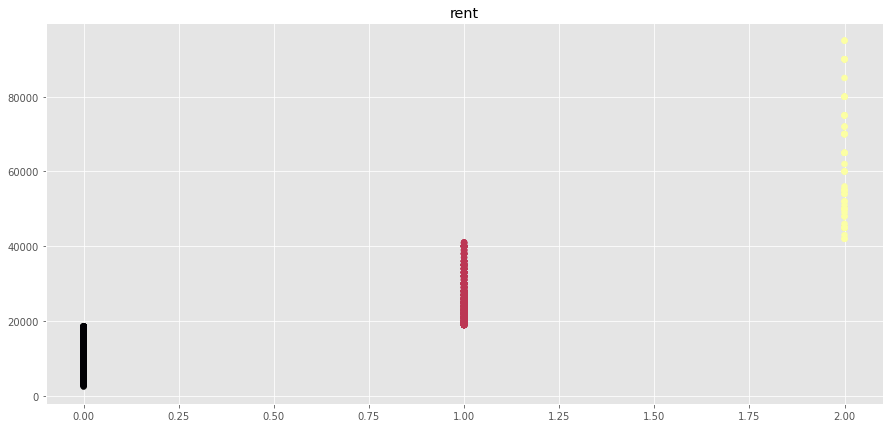

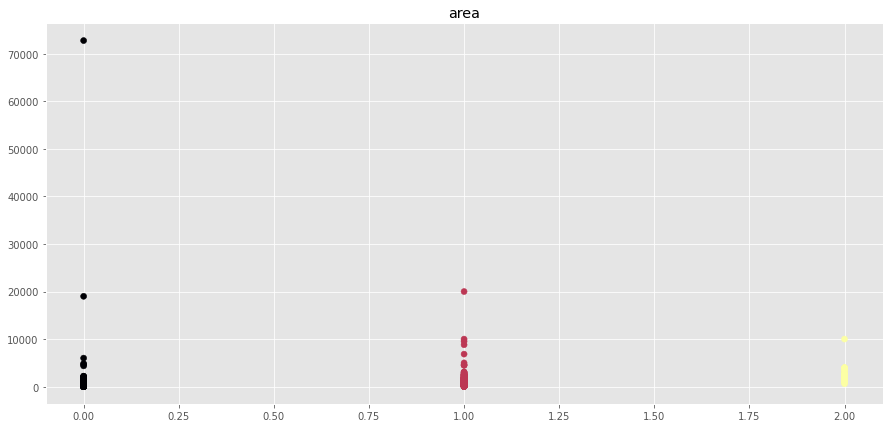

In [ ]:
for  i in ['rent','area']:
 plt.figure(figsize=(15,7))
 plt.title(i)
 plt.scatter(df1['cluster_num'],df1[i], c = kmeansp , cmap = 'inferno')

In [ ]:
cluster_1 = df1[df1.cluster_num == 0]
cluster_2 = df1[df1.cluster_num == 1]
cluster_3 = df1[df1.cluster_num == 2]


In [ ]:
cluster_1.to_csv('cluster1.csv')
cluster_2.to_csv('cluster2.csv')
cluster_3.to_csv('cluster3.csv')